# NetworkX

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from sklearn import covariance
import networkx as nx
from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['AMD','AAPL','MSFT','GS', 'AMZN', 'GOOGL', 'TSLA', 'INTC']
start = '2016-01-01'
end = '2022-01-01'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  8 of 8 completed


,AAPL,AMD,AMZN,GOOGL,GS,INTC,MSFT,TSLA
Date,,,,,,,,
2016-01-04,24.220572,2.77,636.989990,759.440002,158.829605,28.746815,49.488731,44.681999
2016-01-05,23.613628,2.75,633.789978,761.530029,156.094925,28.611492,49.714500,44.686001
2016-01-06,23.151514,2.51,632.650024,759.330017,152.284210,27.977184,48.811417,43.807999
2016-01-07,22.174410,2.28,607.940002,741.000000,147.603821,26.928461,47.113625,43.130001
2016-01-08,22.291670,2.14,607.049988,730.909973,146.994095,26.649361,47.258121,42.200001


In [3]:
num_of_years = 10
start = dt.datetime.now() - dt.timedelta(int(365.25 * num_of_years))
end = dt.datetime.now()

In [4]:
df = np.log1p(df.pct_change()).iloc[1:]


In [5]:
# Glasso algorithm
edge_model = covariance.GraphicalLassoCV(cv=10)
df /= df.std(axis=0)
df = df.dropna()

In [6]:
df.head()

,AAPL,AMD,AMZN,GOOGL,GS,INTC,MSFT,TSLA
Date,,,,,,,,
2016-01-05,-1.369839,-0.190143,-0.272857,0.167467,-0.894614,-0.225666,0.270017,0.002489
2016-01-06,-1.066788,-2.396154,-0.097534,-0.176293,-1.273116,-1.072210,-1.087529,-0.551459
2016-01-07,-2.327546,-2.521819,-2.158518,-1.489003,-1.607987,-1.827207,-2.100144,-0.433456
2016-01-08,0.284681,-1.662793,-0.079374,-0.835441,-0.213221,-0.498277,0.181664,-0.605781
2016-01-11,0.867000,2.344379,0.945759,0.179814,0.559371,0.827598,-0.034018,-0.418002


In [7]:
edge_model.fit(df)

GraphicalLassoCV(cv=10)

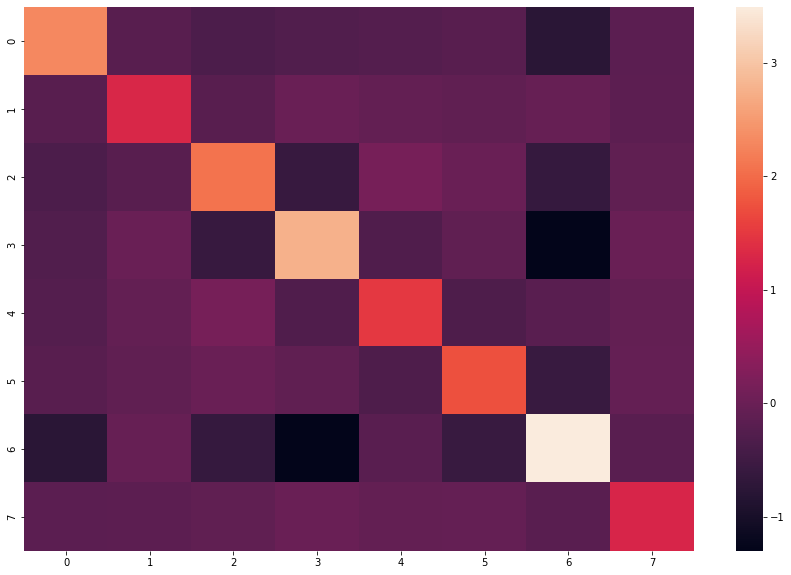

In [8]:
p = edge_model.precision_
rcParams['figure.figsize'] = 15,10
sns.heatmap(p)
plt.show()

In [9]:
p = pd.DataFrame(p)
links = p.stack().reset_index()
links.columns = ['var1', 'var2','value']
links=links.loc[(abs(links['value']) > 0.17) &  (links['var1'] != links['var2'])]

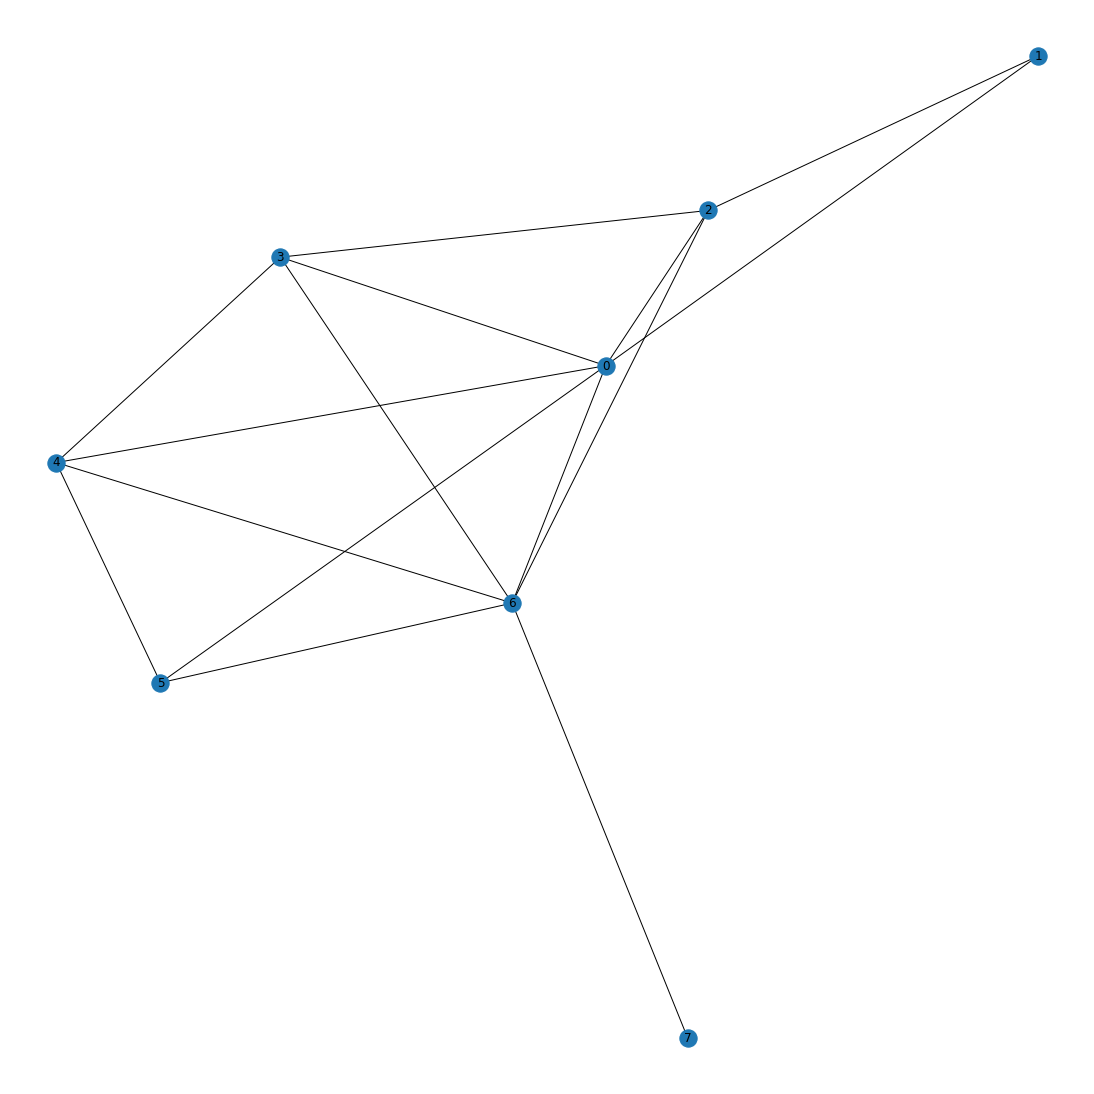

In [10]:
G=nx.from_pandas_edgelist(links,'var1','var2', create_using=nx.Graph())
pos = nx.spring_layout(G, k=0.2*1/np.sqrt(len(G.nodes())), iterations=20)
plt.figure(3, figsize=(15, 15))
nx.draw(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.show()